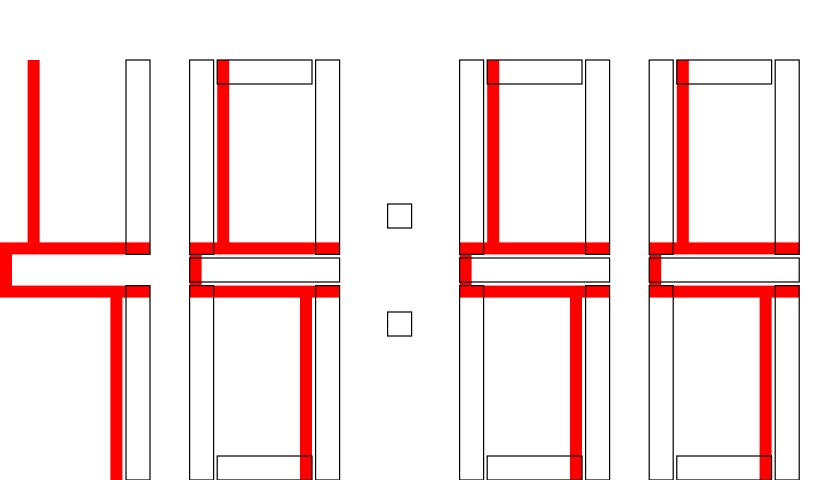

In [3]:
import drawSvg as draw
from copy import deepcopy

DRAWING_HEIGHT = 4
DRAWING_WIDTH = 7

DIGIT_HEIGHT = 3.5
DIGIT_WIDTH = 1.25
DIGIT_SPACING = 0.33
SEGMENT_SPACING = 0.03
SEGMENT_THICKNESS = 0.2
HORIZONTAL_SEGMENT_WIDTH = DIGIT_WIDTH - (2 * SEGMENT_SPACING) - (2 * SEGMENT_THICKNESS)
VERTICAL_SEGMENT_HEIGHT = (DIGIT_HEIGHT - SEGMENT_THICKNESS - (2 * SEGMENT_SPACING)) / 2

# Vertical distance between colon segments
COLON_VERTICAL_DISTANCE = 0.7
# Spacing to the left and right of the colon
COLON_HORIZONTAL_MARGIN = 0.4

TRACE_WIDTH = 0.1
PAD_LENGTH = 0.1
PAD_WIDTH = 0.1

drawing = draw.Drawing(
    DRAWING_WIDTH, DRAWING_HEIGHT, stroke_width=0.01, stroke="black", fill="none"
)

segments = {
    "a": {
        "shape": draw.Rectangle(
            SEGMENT_THICKNESS + SEGMENT_SPACING,
            DIGIT_HEIGHT - SEGMENT_THICKNESS,
            HORIZONTAL_SEGMENT_WIDTH,
            SEGMENT_THICKNESS,
        )
    },
    "b": {
        "shape": draw.Rectangle(
            DIGIT_WIDTH - SEGMENT_THICKNESS,
            DIGIT_HEIGHT - VERTICAL_SEGMENT_HEIGHT,
            SEGMENT_THICKNESS,
            VERTICAL_SEGMENT_HEIGHT,
        )
    },
    "c": {
        "shape": draw.Rectangle(
            DIGIT_WIDTH - SEGMENT_THICKNESS,
            0,
            SEGMENT_THICKNESS,
            VERTICAL_SEGMENT_HEIGHT,
        )
    },
    "d": {
        "shape": draw.Rectangle(
            SEGMENT_THICKNESS + SEGMENT_SPACING,
            0,
            HORIZONTAL_SEGMENT_WIDTH,
            SEGMENT_THICKNESS,
        )
    },
    "e": {"shape": draw.Rectangle(0, 0, SEGMENT_THICKNESS, VERTICAL_SEGMENT_HEIGHT)},
    "f": {
        "shape": draw.Rectangle(
            0,
            DIGIT_HEIGHT - VERTICAL_SEGMENT_HEIGHT,
            SEGMENT_THICKNESS,
            VERTICAL_SEGMENT_HEIGHT,
        )
    },
    "g": {
        "shape": draw.Rectangle(
            0, VERTICAL_SEGMENT_HEIGHT + SEGMENT_SPACING, DIGIT_WIDTH, SEGMENT_THICKNESS
        )
    },
}

first_digit = draw.Group()
first_digit.extend([segments["b"]["shape"], segments["c"]["shape"]])

full_digit = draw.Group()
full_digit.extend([s["shape"] for s in segments.values()])

colon = draw.Group()
colon.extend(
    [
        draw.Rectangle(0, 0, SEGMENT_THICKNESS, SEGMENT_THICKNESS),
        draw.Rectangle(
            0,
            COLON_VERTICAL_DISTANCE + SEGMENT_THICKNESS,
            SEGMENT_THICKNESS,
            SEGMENT_THICKNESS,
        ),
    ]
)

vertical_segment_pad = draw.Group()
vertical_segment_pad.extend(
    [
        draw.Line(
            -SEGMENT_SPACING,
            DIGIT_HEIGHT - TRACE_WIDTH / 2,
            SEGMENT_THICKNESS,
            DIGIT_HEIGHT - TRACE_WIDTH / 2,
            stroke="red",
            stroke_width=TRACE_WIDTH,
        ),
        draw.Line(
            -SEGMENT_SPACING - PAD_LENGTH,
            DIGIT_HEIGHT - PAD_WIDTH / 2,
            -SEGMENT_SPACING,
            DIGIT_HEIGHT - PAD_WIDTH / 2,
            stroke="red",
            stroke_width=PAD_WIDTH,
        ),
    ]
)


display = draw.Group()
horizontal_offset = 0
for d in (first_digit, full_digit, colon, full_digit, full_digit):
    if d is colon:
        colon.args["transform"] = "translate({} {})".format(
            # Horizontal offset
            horizontal_offset + COLON_HORIZONTAL_MARGIN - DIGIT_SPACING,
            # Vertical center
            -(DIGIT_HEIGHT / 2)
            + ((COLON_VERTICAL_DISTANCE + (2 * SEGMENT_THICKNESS)) / 2),
        )

        horizontal_offset += (
            SEGMENT_THICKNESS - DIGIT_SPACING + (COLON_HORIZONTAL_MARGIN * 2)
        )
    else:
        d = deepcopy(d)
        d.args["transform"] = f"translate({horizontal_offset} 0)"
        # Common-digit traces
        p = draw.Path(stroke_width=TRACE_WIDTH, stroke="red")
        p.M(
            (
                horizontal_offset
                + SEGMENT_THICKNESS
                + SEGMENT_SPACING
                + HORIZONTAL_SEGMENT_WIDTH
            )
            - (TRACE_WIDTH / 2),
            0,
        )
        p.v(VERTICAL_SEGMENT_HEIGHT - (TRACE_WIDTH / 2))
        p.h(SEGMENT_SPACING + SEGMENT_THICKNESS + (TRACE_WIDTH / 2))
        p.H(horizontal_offset + (TRACE_WIDTH / 2))
        p.v(SEGMENT_SPACING * 2 + SEGMENT_THICKNESS + TRACE_WIDTH)
        p.h(DIGIT_WIDTH - TRACE_WIDTH / 2)
        p.M(
            horizontal_offset
            + SEGMENT_THICKNESS
            + SEGMENT_SPACING
            + TRACE_WIDTH / 2,
            VERTICAL_SEGMENT_HEIGHT + SEGMENT_SPACING * 2 + SEGMENT_THICKNESS,
        )
        p.v(VERTICAL_SEGMENT_HEIGHT)
        drawing.append(p)

        PAD_WIDTH = 0.125
        PAD_LENGTH = 0.25

        # Common segment traces/pads
        horizontal_offset += DIGIT_WIDTH + DIGIT_SPACING
    display.append(d)

drawing.append(display)


drawing.setPixelScale(120)
drawing.saveSvg("clock_face.svg")
drawing.rasterize()
drawing